<a href="https://colab.research.google.com/github/potat0w/Aaagh-more-math/blob/main/AI_ML_Assignment_3_Module_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [ ]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay
)



# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [ ]:
# TODO: Load regression dataset
df1=pd.read_csv('/content/drive/MyDrive/Datasets/insurance.csv')
df1.shape
df1.info()
target = "charges"
print("Target variable:", target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Target variable: charges


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [ ]:
# TODO: Perform EDA
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_encoded = pd.get_dummies(df1, drop_first=True)

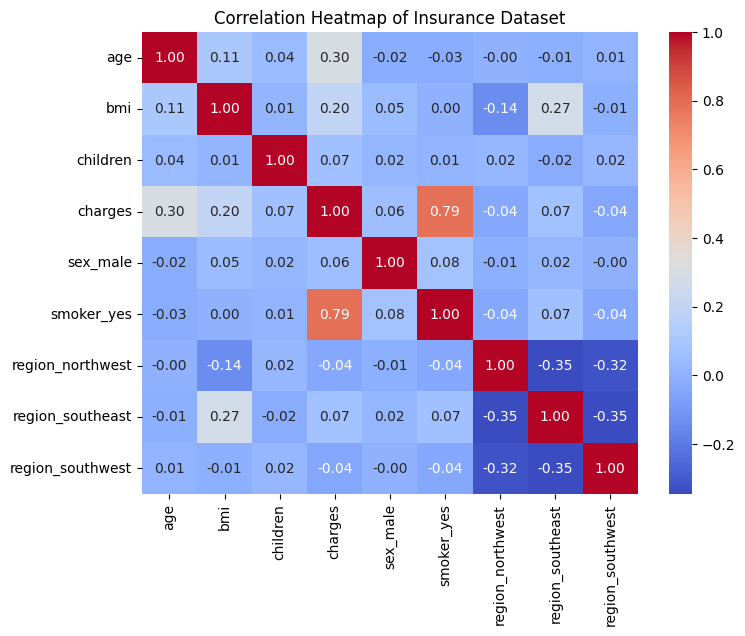

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df_encoded.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Insurance Dataset")
plt.show()


## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [ ]:
# TODO: Prepare features

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train.shape, X_test.shape

((1070, 8), (268, 8))

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Multiple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R²:", r2_lr)


Linear Regression Metrics:
RMSE: 5796.284659276273
MAE: 4181.19447375365
R²: 0.7835929767120724


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [ ]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)


poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)


y_pred_poly = poly_lr.predict(X_poly_test)


rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression Metrics:")
print("RMSE:", rmse_poly)
print("MAE:", mae_poly)
print("R²:", r2_poly)


Polynomial Regression Metrics:
RMSE: 4551.132385233192
MAE: 2729.500133639456
R²: 0.8665830903164841


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [ ]:
# TODO: Support Vector Regression
svr = SVR(kernel="rbf")
svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)


rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR Metrics:")
print("RMSE:", rmse_svr)
print("MAE:", mae_svr)
print("R²:", r2_svr)


SVR Metrics:
RMSE: 12889.096314656128
MAE: 8612.408423351833
R²: -0.07008155372454805


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [22]:
# TODO: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)
rf_reg.fit(X_train, y_train)


y_pred_rf = rf_reg.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Metrics:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)


Random Forest Regressor Metrics:
RMSE: 4586.935636079838
MAE: 2559.9014228678197
R²: 0.8644756815249467


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [24]:
# TODO: Load classification dataset
df2=pd.read_csv('/content/drive/MyDrive/Datasets/loan_data.csv')
df2.shape
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Target has two classes: 0 (78%), 1(22%).Model may predict 0 more often, ignoring defaults.Using confusion matrix, precision, recall, F1-score can evaluate it well.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


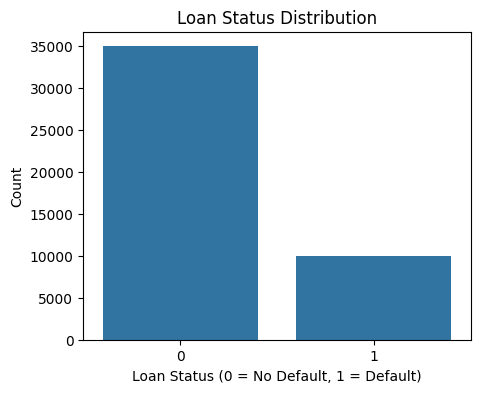

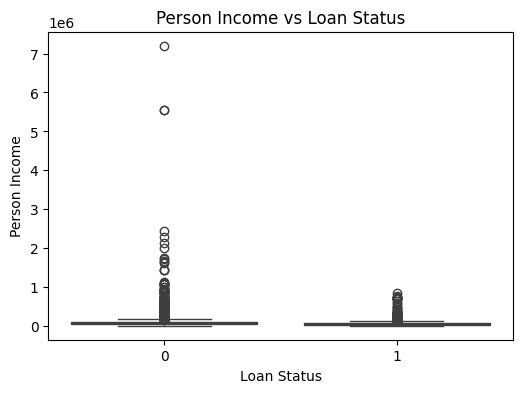

In [28]:
# TODO: Classification EDA
plt.figure(figsize=(5,4))
sns.countplot(x='loan_status', data=df2)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='person_income', data=df2)
plt.title('Person Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Person Income')
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [30]:
# TODO: Prepare classification features

X = df2.drop("loan_status", axis=1)
y = df2["loan_status"]

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


X_train.shape, X_test.shape


((36000, 22), (9000, 22))

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [ ]:
# TODO: Logistic Regression

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [ ]:
# TODO: SVM Classification

## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [ ]:
# TODO: Naive Bayes

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [ ]:
# TODO: KNN

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [ ]:
# TODO: Random Forest Classifier

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here